In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/content/gdrive/MyDrive/face_mask_detection'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/gdrive/MyDrive/face_mask_detection/annotations/maksssksksss110.xml
/content/gdrive/MyDrive/face_mask_detection/annotations/maksssksksss108.xml
/content/gdrive/MyDrive/face_mask_detection/annotations/maksssksksss109.xml
/content/gdrive/MyDrive/face_mask_detection/annotations/maksssksksss0.xml
/content/gdrive/MyDrive/face_mask_detection/annotations/maksssksksss101.xml
/content/gdrive/MyDrive/face_mask_detection/annotations/maksssksksss104.xml
/content/gdrive/MyDrive/face_mask_detection/annotations/maksssksksss10.xml
/content/gdrive/MyDrive/face_mask_detection/annotations/maksssksksss102.xml
/content/gdrive/MyDrive/face_mask_detection/annotations/maksssksksss11.xml
/content/gdrive/MyDrive/face_mask_detection/annotations/maksssksksss106.xml
/content/gdrive/MyDrive/face_mask_detection/annotations/maksssksksss107.xml
/content/gdrive/MyDrive/face_mask_detection/annotations/maksssksksss1.xml
/content/gdrive/MyDrive/face_mask_detection/annotations/maksssksksss105.xml
/content/gdrive/My

In [ ]:
import os 
import numpy 

In [ ]:
os.mkdir("/content/gdrive/MyDrive/face_mask/train_data")
os.mkdir("/content/gdrive/MyDrive/face_mask/train_data/images")
os.mkdir("/content/gdrive/MyDrive/face_mask/train_data/labels")
os.mkdir("/content/gdrive/MyDrive/face_mask/train_data/images/train")
os.mkdir("/content/gdrive/MyDrive/face_mask/train_data/images/val")
os.mkdir("/content/gdrive/MyDrive/face_mask/train_data/labels/train")
os.mkdir("/content/gdrive/MyDrive/face_mask/train_data/labels/val")

In [ ]:
#Convert xml files to txt files

import xml.etree.ElementTree as ET
from xml.dom.minidom import parse

path = "/content/gdrive/MyDrive/face_mask_detection/annotations"
classes = {"with_mask":0,"without_mask":1,"mask_weared_incorrect":2}

for annotations in os.listdir(path):
    
    
    dom = parse(os.path.join(path,annotations))
    root = dom.documentElement
    filename = ".txt".join(root.getElementsByTagName("filename")[0].childNodes[0].data.split(".png"))

    image_width = root.getElementsByTagName("width")[0].childNodes[0].data
    image_height = root.getElementsByTagName("height")[0].childNodes[0].data
    with open("/content/gdrive/MyDrive/face_mask/train_data/labels/train/"+filename,"w") as r:
        
        for items in root.getElementsByTagName("object") :
           name = items.getElementsByTagName("name")[0].childNodes[0].data
           xmin = items.getElementsByTagName("xmin")[0].childNodes[0].data
           ymin = items.getElementsByTagName("ymin")[0].childNodes[0].data
           xmax = items.getElementsByTagName("xmax")[0].childNodes[0].data
           ymax = items.getElementsByTagName("ymax")[0].childNodes[0].data
           x_center_norm = ((int(xmin)+int(xmax)) / 2 ) / int(image_width)
           y_center_norm = ((int(ymin)+int(ymax))/2) / int(image_height)
           width_norm = ((int(xmax)-int(xmin))/int(image_width))
           height_norm = ((int(ymax)-int(ymin))/int(image_height))

           r.write(str(classes[name]))
           r.write(" ")
           r.write(str(x_center_norm))
           r.write(" ")
           r.write(str(y_center_norm))
           r.write(" ")
           r.write(str(width_norm))
           r.write(" ")
           r.write(str(height_norm))
           r.write("\n")

In [ ]:
#Check if we created same amount of txt files as xml files that are in annotations

len(os.listdir("/content/gdrive/MyDrive/face_mask/train_data/labels/train/")) == len(os.listdir("/content/gdrive/MyDrive/face_mask_detection/images"))

True

In [ ]:
#Copy images to train_data/images/train folder

import shutil
path = "/content/gdrive/MyDrive/face_mask_detection/images"
for images in os.listdir(path):
    image_path = os.path.join(path,images)
    shutil.copy(image_path,"/content/gdrive/MyDrive/face_mask/train_data/images/train/"+images)

In [ ]:
#Check if images are equal to labels

len(os.listdir("/content/gdrive/MyDrive/face_mask/train_data/images/train/")) == len(os.listdir("/content/gdrive/MyDrive/face_mask/train_data/labels/train/"))

True

In [ ]:
#Shuffle and move to val folders to create train-val split

from random import shuffle
from glob import glob
import random
import shutil

random.seed(42)
files = glob("/content/gdrive/MyDrive/face_mask/train_data/images/train/*.png")
shuffle(files)
txt_train_path = "/content/gdrive/MyDrive/face_mask/train_data/labels/train/"
img_train_path = "/content/gdrive/MyDrive/face_mask/train_data/images/train/"
txt_val_path = "/content/gdrive/MyDrive/face_mask/train_data/labels/val/"
img_val_path = "/content/gdrive/MyDrive/face_mask/train_data/images/val/"

for i in files[:177]:
    filename = i.split("/")[-1]
    shutil.move(txt_train_path+filename.replace(".png",".txt"),txt_val_path+filename.replace(".png",".txt"))
    shutil.move(img_train_path+filename,img_val_path+filename)

In [ ]:
#Check if val labels and val images are equal

len(os.listdir("/content/gdrive/MyDrive/face_mask/train_data/labels/val/")) == len(os.listdir("/content/gdrive/MyDrive/face_mask/train_data/images/val/"))

True

In [ ]:
#Create data.yaml file that points to our dataset in a primitive way

with open("/content/gdrive/MyDrive/face_mask/data.yaml","w") as f:
    f.write("train: ")
    f.write("/content/gdrive/MyDrive/face_mask/train_data/images/train")
    f.write("\n")
    f.write("val: ")
    f.write("/content/gdrive/MyDrive/face_mask/train_data/images/val")
    f.write("\n")
    f.write("nc: ")
    f.write(" 3")
    f.write("\n")
    f.write("names: ")
    f.write(" ['with_mask','without_mask','mask_weared_incorrect']")

In [ ]:
with open("/content/gdrive/MyDrive/face_mask/data.yaml","r") as f:
    print(f.read())

train: /content/gdrive/MyDrive/face_mask/train_data/images/train
val: /content/gdrive/MyDrive/face_mask/train_data/images/val
nc:  3
names:  ['with_mask','without_mask','mask_weared_incorrect']


In [ ]:
%cd /content/gdrive/MyDrive/face_mask/train_data/labels/train
!ls -F | grep .txt | wc -l
%cd ..

%cd /content/gdrive/MyDrive/face_mask/train_data/labels/val
!ls -F | grep .txt | wc -l
%cd ..

%cd /content/gdrive/MyDrive/face_mask/train_data/images/train
!ls -F | grep .png | wc -l
%cd ..

%cd /content/gdrive/MyDrive/face_mask/train_data/images/val
!ls -F | grep .png | wc -l
%cd ..

/content/gdrive/MyDrive/face_mask/train_data/labels/train
707
/content/gdrive/MyDrive/face_mask/train_data/labels
/content/gdrive/MyDrive/face_mask/train_data/labels/val
177
/content/gdrive/MyDrive/face_mask/train_data/labels
/content/gdrive/MyDrive/face_mask/train_data/images/train
707
/content/gdrive/MyDrive/face_mask/train_data/images
/content/gdrive/MyDrive/face_mask/train_data/images/val
177
/content/gdrive/MyDrive/face_mask/train_data/images


In [ ]:
%cd /content/gdrive/MyDrive/face_mask

/content/gdrive/MyDrive/face_mask


In [ ]:
# clone Yolov5 repo
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 9993, done.
remote: Total 9993 (delta 0), reused 0 (delta 0), pack-reused 9993
Receiving objects: 100% (9993/9993), 10.34 MiB | 5.31 MiB/s, done.
Resolving deltas: 100% (6926/6926), done.


In [ ]:
%cd yolov5

/content/gdrive/MyDrive/face_mask/yolov5


In [ ]:
!pip install -r requirements.txt

In [ ]:
!nvidia-smi


Sat Nov 20 09:16:37 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import torch
torch.cuda.is_available()
# Output would be True if Pytorch is using GPU otherwise it would be False.

True

In [ ]:
#train

!python train.py --img 640 --batch 32 --epochs 100 --data /content/gdrive/MyDrive/face_mask/data.yaml --weights yolov5s.pt --cache 

train: weights=yolov5s.pt, cfg=, data=/content/gdrive/MyDrive/face_mask/data.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=100, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 2021-11-20 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, trans

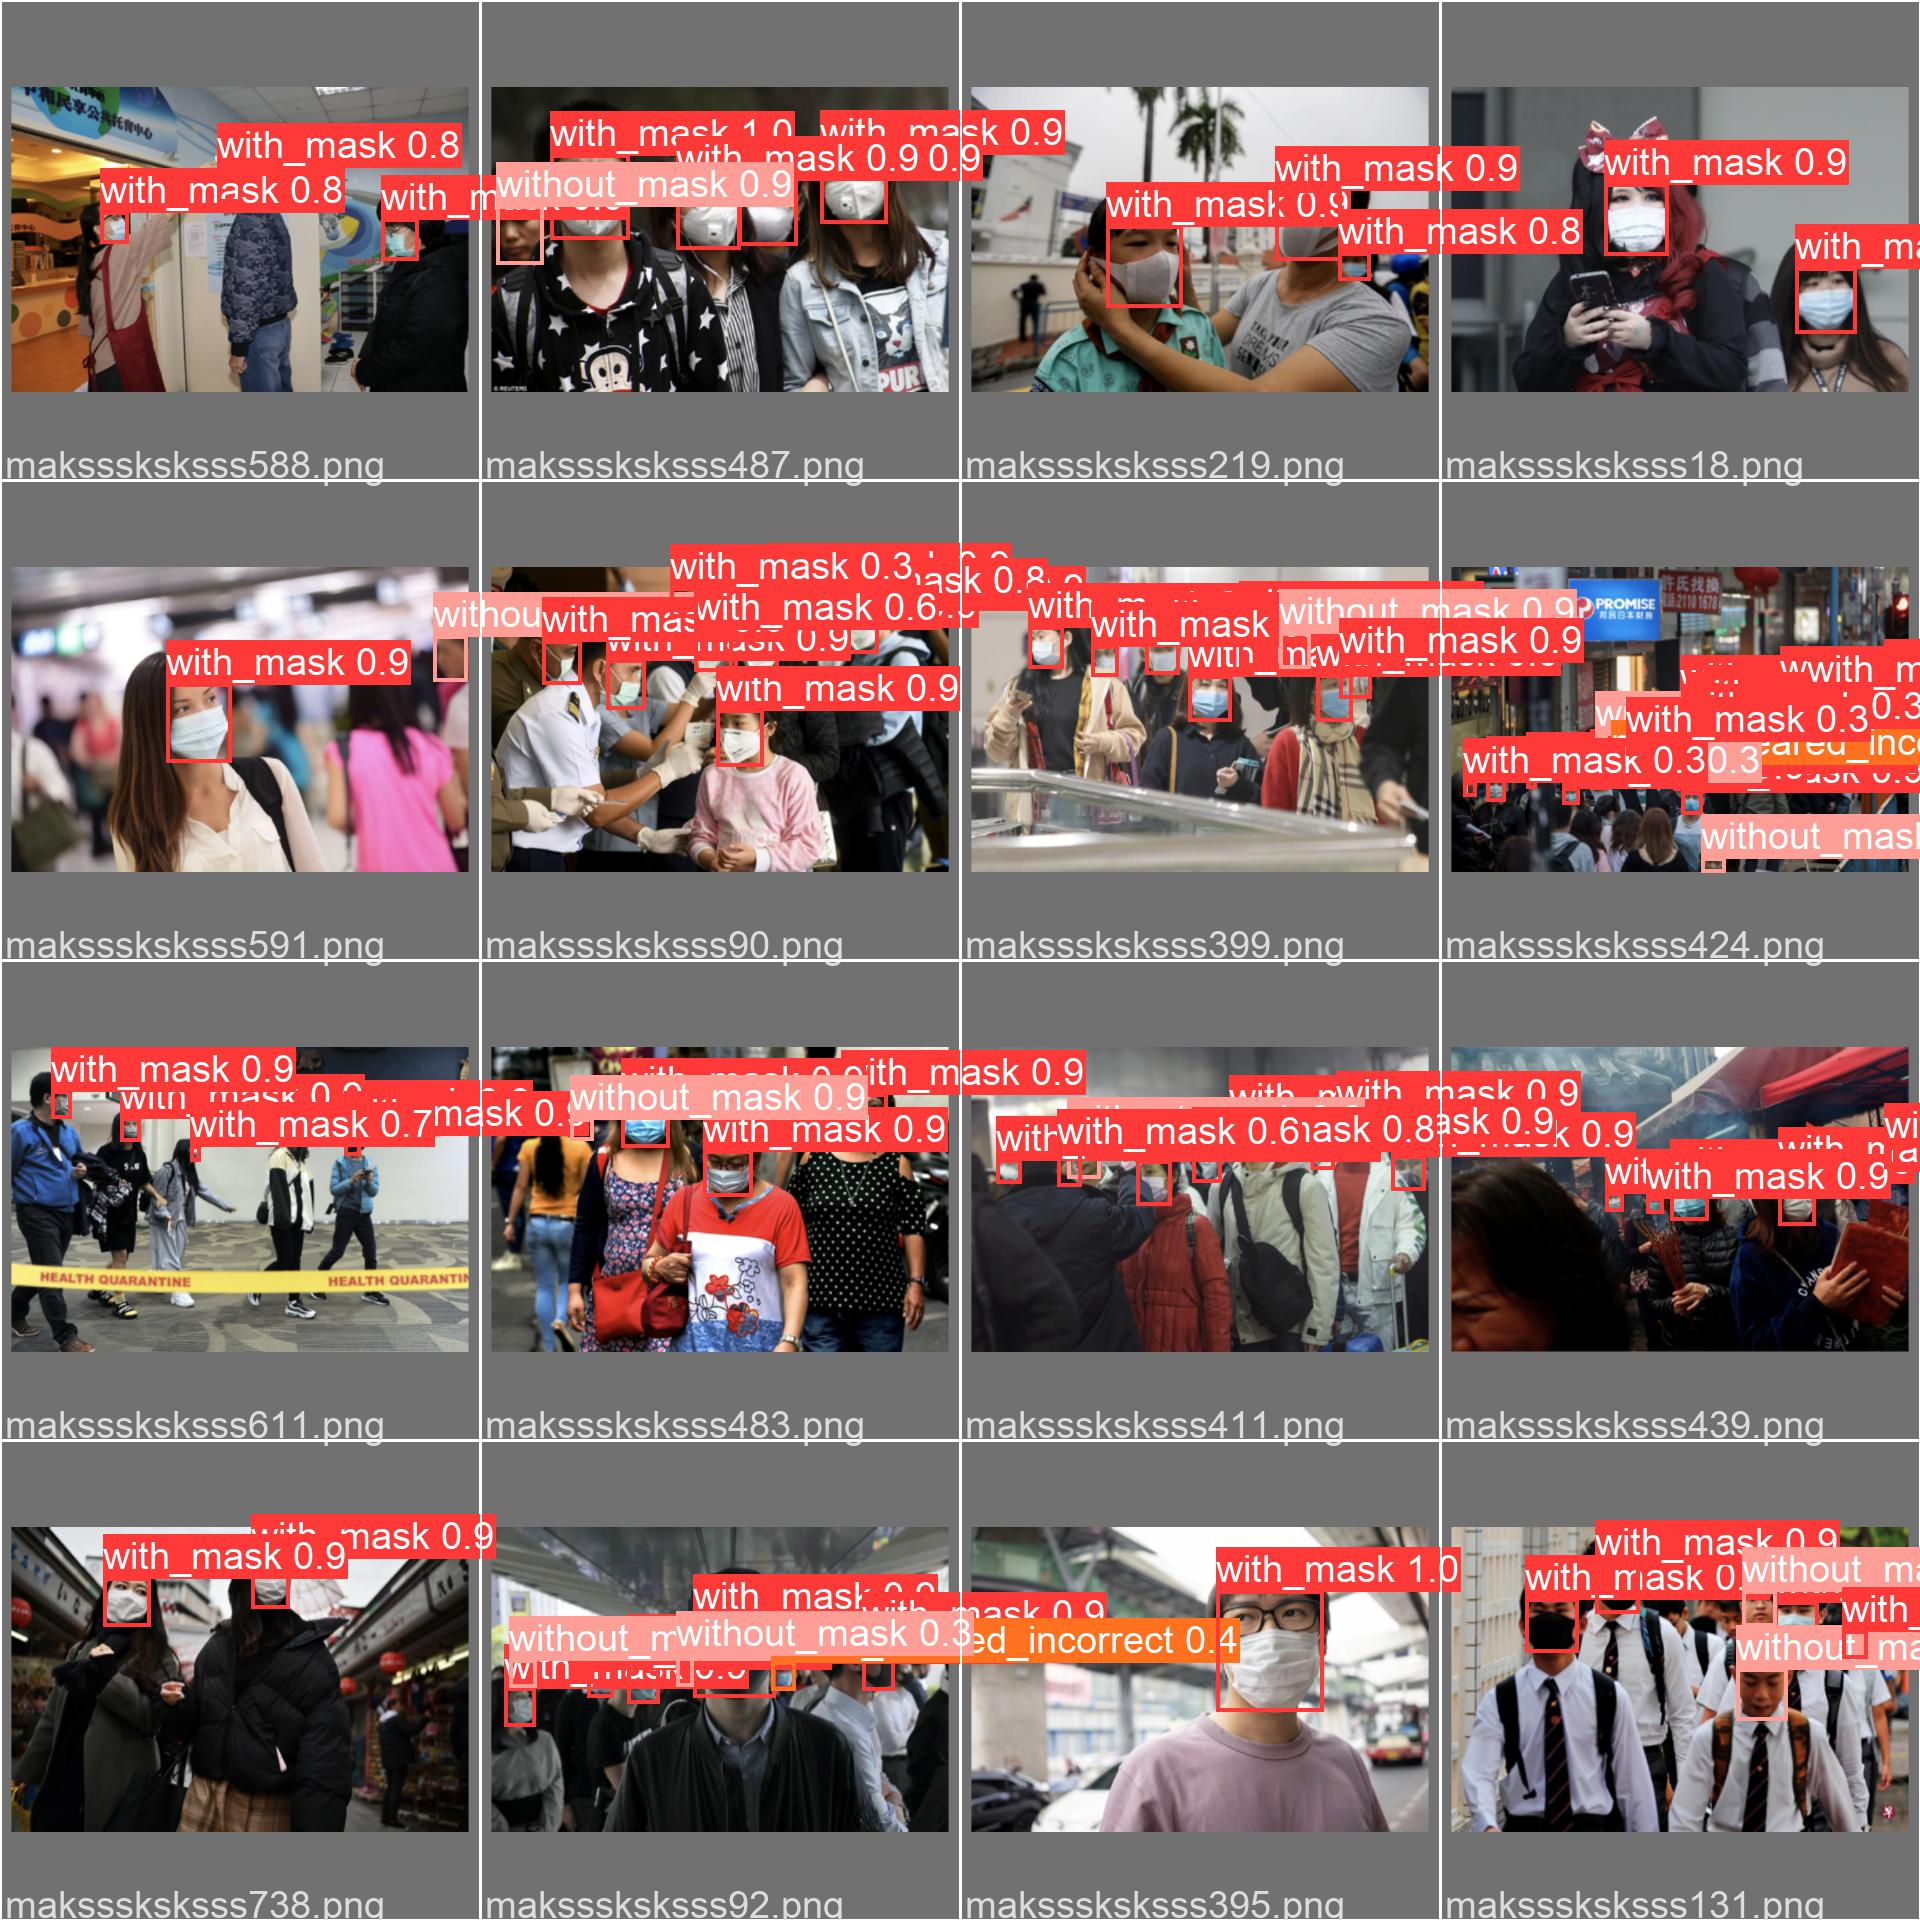

In [ ]:
# display detected images
from IPython.display import Image
Image('/content/gdrive/MyDrive/face_mask/yolov5/runs/train/exp2/val_batch1_pred.jpg')

In [ ]:
#download image
!wget https://cdn.abcotvs.com/dip/images/6251257_061620-kgo-maskwear-img_Image_00-00-37,26.jpg?w=1600

--2021-11-23 08:54:37--  https://cdn.abcotvs.com/dip/images/6251257_061620-kgo-maskwear-img_Image_00-00-37,26.jpg?w=1600
Resolving cdn.abcotvs.com (cdn.abcotvs.com)... 23.35.78.72, 2600:1407:21:2a9::38de, 2600:1407:21:2b5::38de
Connecting to cdn.abcotvs.com (cdn.abcotvs.com)|23.35.78.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘6251257_061620-kgo-maskwear-img_Image_00-00-37,26.jpg?w=1600’

6251257_061620-kgo-     [ <=>                ] 403.77K  --.-KB/s    in 0.04s   

2021-11-23 08:54:39 (9.27 MB/s) - ‘6251257_061620-kgo-maskwear-img_Image_00-00-37,26.jpg?w=1600’ saved [413459]



In [ ]:
!python detect.py --source "/content/gdrive/MyDrive/face_mask/yolov5/76176408.jpg" --weights '/content/gdrive/MyDrive/face_mask/yolov5/runs/train/exp2/weights/best.pt'

detect: weights=['/content/gdrive/MyDrive/face_mask/yolov5/runs/train/exp2/weights/best.pt'], source=/content/gdrive/MyDrive/face_mask/yolov5/76176408.jpg, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 2021-11-20 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 213 layers, 7018216 parameters, 0 gradients
image 1/1 /content/gdrive/MyDrive/face_mask/yolov5/76176408.jpg: 416x640 1 with_mask, 1 without_mask, Done. (0.031s)
Speed: 0.7ms pre-process, 31.1ms inference, 2.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp10


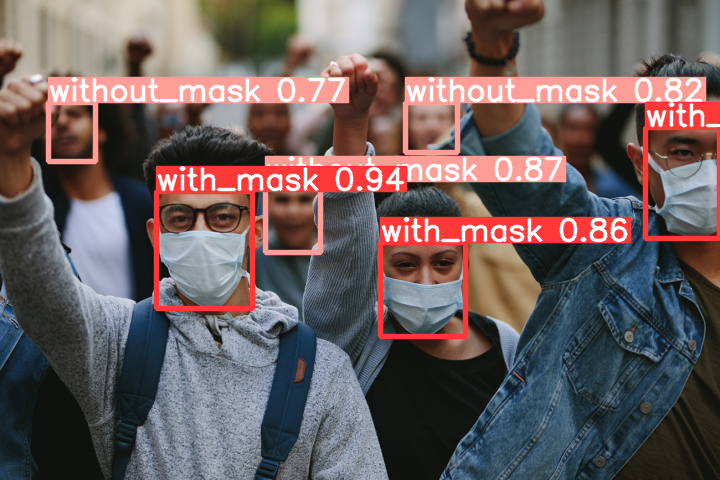

In [ ]:
Image("/content/gdrive/MyDrive/face_mask/yolov5/runs/detect/exp3/gettyimages-1215069129_jacoblund.png")

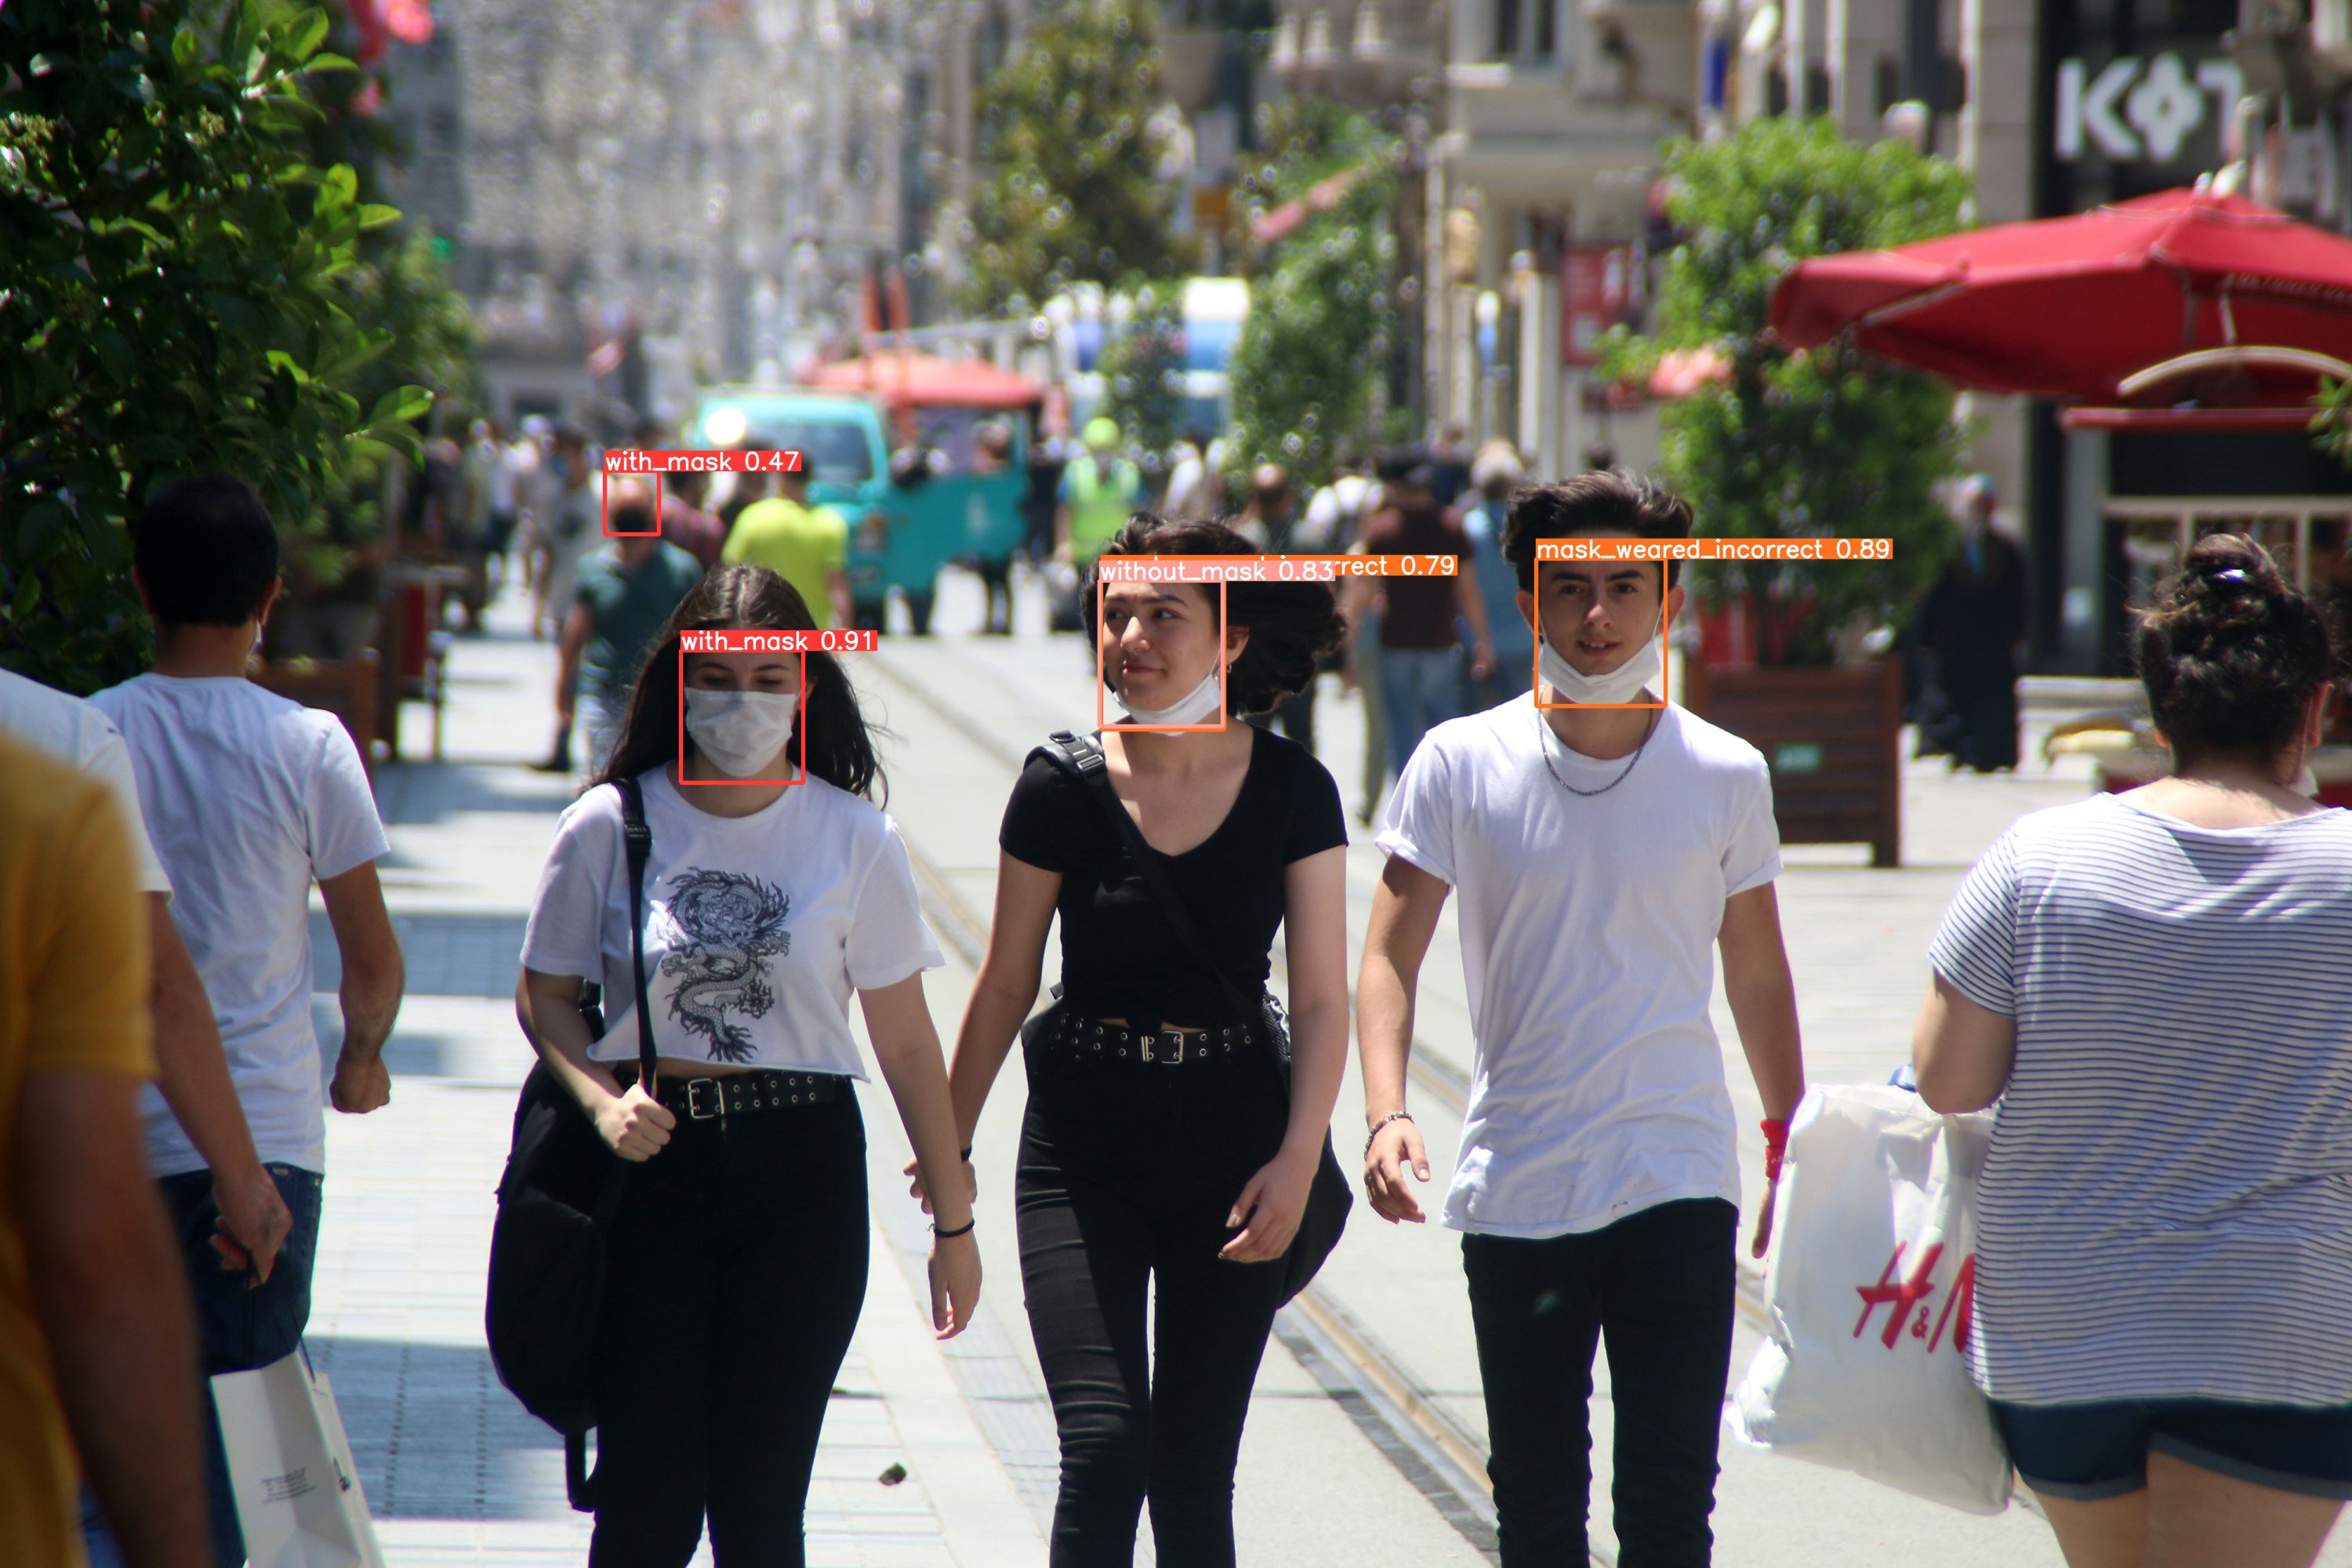

In [ ]:
Image("/content/gdrive/MyDrive/face_mask/yolov5/runs/detect/exp4/42169.jpg")

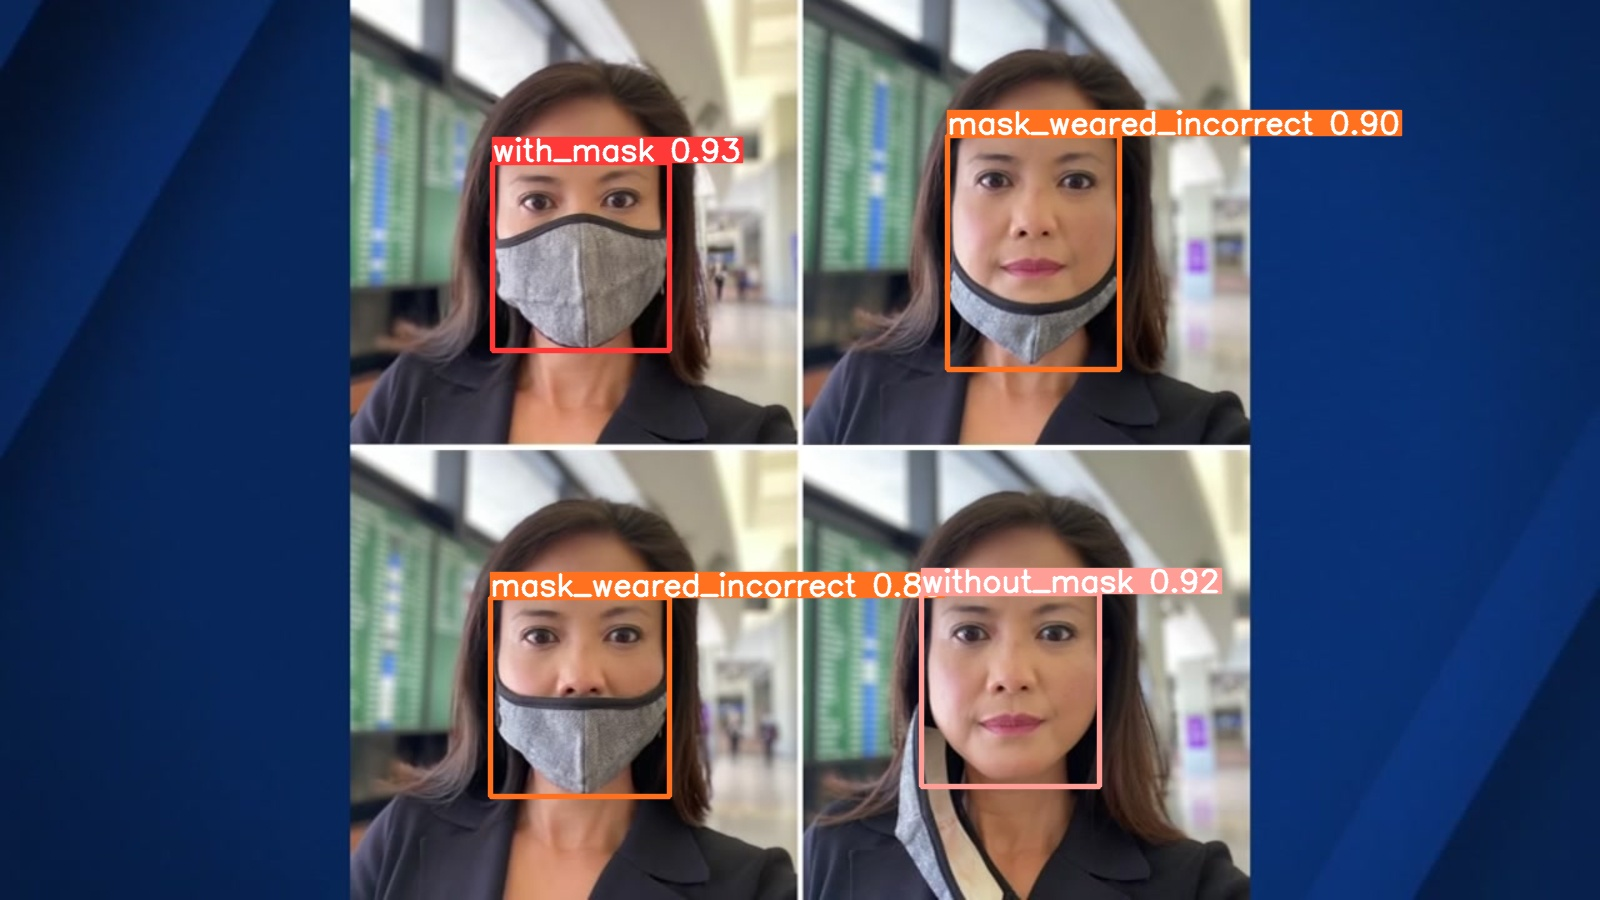

In [ ]:
Image("/content/gdrive/MyDrive/face_mask/yolov5/runs/detect/exp8/test.jpg")

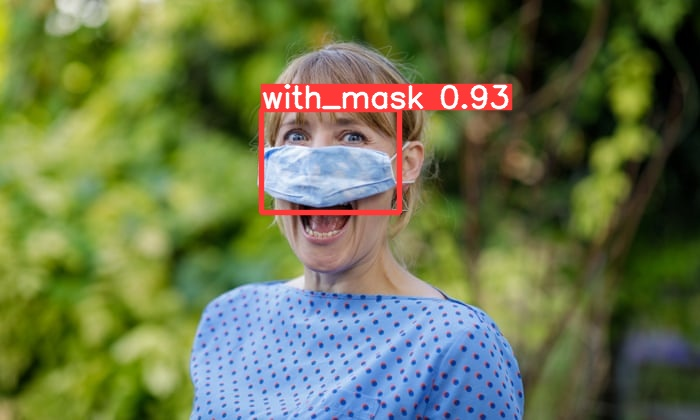

In [ ]:
Image("/content/gdrive/MyDrive/face_mask/yolov5/runs/detect/exp9/3000.jpg")

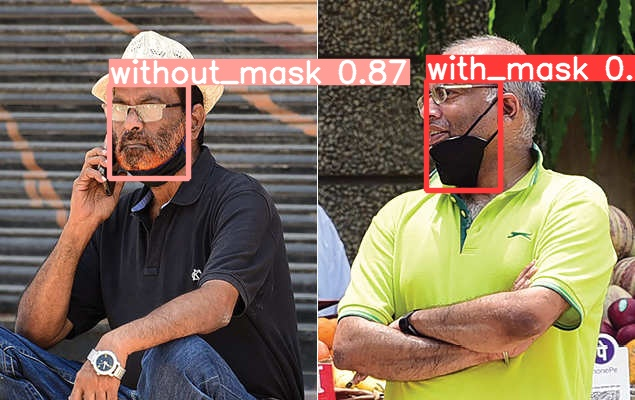

In [ ]:
Image("/content/gdrive/MyDrive/face_mask/yolov5/runs/detect/exp10/76176408.jpg")